## Machine Learning 

1. Helper Function + Import Libraries
2. Random Forest 
- Random Forest 
- Random Forest + SMOTE
3. XGBoost 
- XGBoost 
- XGBoost + SMOTE
- XGBoost + Calibrated Probabilities 
- XGBoost + Calibrated Probabilities (Set recall for Class 0 threshold to 80%)
4. K-Nearest Neighbours 
- K-Nearest Neighbours 
- K-Nearest Neighbours + SMOTE 
- K-Nearest Neighbours + Tuning 
- K-Nearest Neighbours (Confidence of Model)



## 1. Helper Function + Import Libraries

In [11]:
#HELPER FUNCTION 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    """
    Prints:
      - Confusion matrix
      - Precision/Recall/F1 for each class (0, 1, …)
      - Macro-average Precision/Recall/F1 (unweighted)
    """
    # 1) Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # 2) Per-class metrics
    labels = sorted(set(y_true))
    for lbl in labels:
        p = precision_score(y_true, y_pred, pos_label=lbl)
        r = recall_score(y_true, y_pred, pos_label=lbl)
        f = f1_score(y_true, y_pred, pos_label=lbl)
        print(f"\nClass {lbl} — Precision: {p:.4f}, Recall: {r:.4f}, F1: {f:.4f}")

# Whatever u need to import

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, recall_score, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier

credit_data = pd.read_csv('cleaned-dataset.csv')
numerical_columns = credit_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = credit_data.select_dtypes(include=['object', 'category']).columns.tolist()



## 2. Random Forest

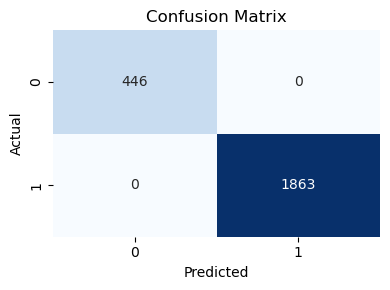


Class 0 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Class 1 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [21]:
# a. Random Forest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# 1) Prepare X and y
X = credit_data[numerical_columns + categorical_columns]
y = credit_data['Loan Status']

# 2) Encode the target labels to 0/1
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3) Build preprocessing transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# 4) Assemble pipeline with Random Forest
rf_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('rf', RandomForestClassifier(
        n_estimators=100,          # number of trees
        max_depth=None,            # nodes are expanded until all leaves are pure
        class_weight='balanced',   # handle class imbalance automatically
        random_state=42
    ))
])

# 5) Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

# 6) Fit and evaluate
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)

evaluate_model(y_test, y_pred)


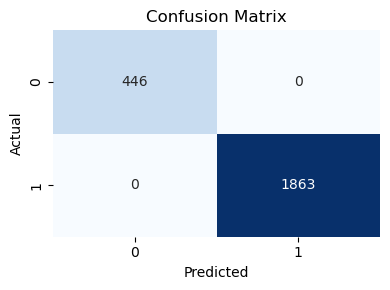


Class 0 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Class 1 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [22]:
# b. Random Forest + SMOTE

# 1) Prepare X and y
X = credit_data[numerical_columns + categorical_columns]
y = credit_data['Loan Status']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2) Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

# 3) Build the preprocessing transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# 4) Assemble SMOTE + Random Forest pipeline
rf_smote_pipe = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(sampling_strategy=1.0, random_state=42)),  # balance classes 1:1
    ('rf', RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42
    ))
])

# 5) Fit the pipeline and evaluate
rf_smote_pipe.fit(X_train, y_train)
y_pred = rf_smote_pipe.predict(X_test)

evaluate_model(y_test, y_pred)


## 3. XGBoost

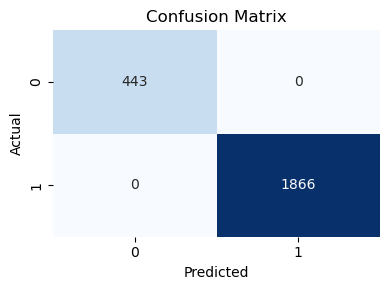


Class 0 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Class 1 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [ ]:
# a. XGBoost 

# 1) Prepare X and y
X = credit_data[numerical_columns + categorical_columns]
y = credit_data['Loan Status']

# 2) Encode the target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3) Build the preprocessing + XGBoost pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

xgb_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('xgb', XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        eval_metric='logloss',
        random_state=42
    ))
])

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# 5) Fit
xgb_pipeline.fit(X_train, y_train)

# 6) Predict & evaluate
y_pred = xgb_pipeline.predict(X_test)
evaluate_model(y_test, y_pred)


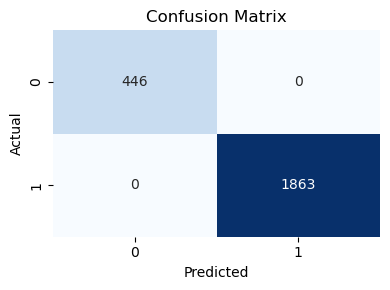


Class 0 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Class 1 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [ ]:

# b. XGBoost + SMOTE

# 1) Prepare X and y
X = credit_data[numerical_columns + categorical_columns]
y = credit_data['Loan Status']

# 2) Encode the target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 4) Build preprocessing transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# 5) SMOTE + XGBoost pipeline
xgb_smote_pipe = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(sampling_strategy=1.0, random_state=42)),  # 1:1 oversampling
    ('xgb', XGBClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ))
])

# 6) Fit and evaluate
xgb_smote_pipe.fit(X_train, y_train)
y_pred = xgb_smote_pipe.predict(X_test)

evaluate_model(y_test, y_pred)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparameters: {'xgb__subsample': 0.6, 'xgb__scale_pos_weight': 0.2395227442207308, 'xgb__n_estimators': 100, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.1, 'xgb__gamma': 5, 'xgb__colsample_bytree': 0.8}


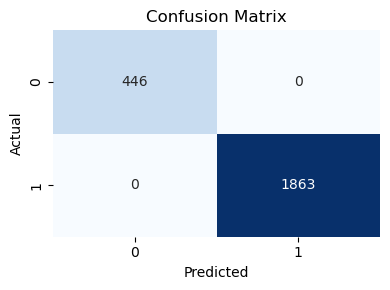


Class 0 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Class 1 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [ ]:
# XGBoost + Calibrated Probabilities 

# 1) Prepare X/y and encode target
X = credit_data[numerical_columns + categorical_columns]
y = credit_data['Loan Status']
le = LabelEncoder()
y = le.fit_transform(y)

# 2) Split into train_full/test, then train/val (val only for calibration)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1,
    random_state=42, stratify=y_train_full
)

# 3) Compute imbalance ratio
ratio = (y_train == 0).sum() / (y_train == 1).sum()

# 4) Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# 5) Hyperparameter search pipeline
search_pipe = Pipeline([
    ('preproc', preprocessor),
    ('xgb', XGBClassifier(
        eval_metric='logloss',
        random_state=42
    ))
])
param_dist = {
    'xgb__n_estimators':      [100, 200, 300],
    'xgb__learning_rate':     [0.01, 0.05, 0.1],
    'xgb__max_depth':         [4, 6, 8],
    'xgb__subsample':         [0.6, 0.8, 1.0],
    'xgb__colsample_bytree':  [0.6, 0.8, 1.0],
    'xgb__gamma':             [0, 1, 5],
    'xgb__scale_pos_weight':  [ratio]
}
rs = RandomizedSearchCV(
    search_pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rs.fit(X_train, y_train)
best = rs.best_params_
print("Best hyperparameters:", best)

# 6) Build final XGB (no early stopping)
xgb_final = XGBClassifier(
    n_estimators=1000,
    learning_rate=best['xgb__learning_rate'],
    max_depth=best['xgb__max_depth'],
    subsample=best['xgb__subsample'],
    colsample_bytree=best['xgb__colsample_bytree'],
    gamma=best['xgb__gamma'],
    scale_pos_weight=ratio,
    eval_metric='logloss',
    random_state=42
)

# Preprocess datasets
X_tr = preprocessor.fit_transform(X_train)
X_va = preprocessor.transform(X_val)
X_te = preprocessor.transform(X_test)

# Train model on training set
xgb_final.fit(X_tr, y_train)

# 7) Calibrate model
calib = CalibratedClassifierCV(xgb_final, cv='prefit', method='isotonic')
calib.fit(X_va, y_val)

# 8) Predict directly with default threshold (0.5)
y_pred = calib.predict(X_te)

# 9) Evaluate predictions
evaluate_model(y_test, y_pred)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best hyperparams: {'xgb__subsample': 0.6, 'xgb__scale_pos_weight': 0.2395227442207308, 'xgb__n_estimators': 100, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.1, 'xgb__gamma': 5, 'xgb__colsample_bytree': 0.8}
Threshold for ≥80% class 0 recall: 0.010 (Recall_0=1.000)


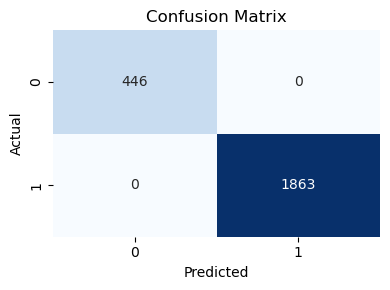


Class 0 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000

Class 1 — Precision: 1.0000, Recall: 1.0000, F1: 1.0000


In [ ]:

# XGBoost + Calibrated Probabilities (Set recall threshold for class 0 to 80%)

# 1) Prepare X/y and encode target
X = credit_data[numerical_columns + categorical_columns]
y = credit_data['Loan Status']
le = LabelEncoder()
y = le.fit_transform(y)

# 2) Split into train_full/test, then train/val (val only for calibration)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1,
    random_state=42, stratify=y_train_full
)

# 3) Compute imbalance ratio
ratio = (y_train == 0).sum() / (y_train == 1).sum()

# 4) Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# 5) Hyperparameter search pipeline
search_pipe = Pipeline([
    ('preproc', preprocessor),
    ('xgb', XGBClassifier(
        # use_label_encoder removed
        eval_metric='logloss',
        random_state=42
    ))
])
param_dist = {
    'xgb__n_estimators':      [100, 200, 300],
    'xgb__learning_rate':     [0.01, 0.05, 0.1],
    'xgb__max_depth':         [4, 6, 8],
    'xgb__subsample':         [0.6, 0.8, 1.0],
    'xgb__colsample_bytree':  [0.6, 0.8, 1.0],
    'xgb__gamma':             [0, 1, 5],
    'xgb__scale_pos_weight':  [ratio]
}
rs = RandomizedSearchCV(
    search_pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rs.fit(X_train, y_train)
best = rs.best_params_
print("Best hyperparams:", best)

# 6) Build final XGB (no early stopping)
xgb_final = XGBClassifier(
    n_estimators=1000,
    learning_rate=best['xgb__learning_rate'],
    max_depth=best['xgb__max_depth'],
    subsample=best['xgb__subsample'],
    colsample_bytree=best['xgb__colsample_bytree'],
    gamma=best['xgb__gamma'],
    scale_pos_weight=ratio,
    # use_label_encoder removed
    eval_metric='logloss',
    random_state=42
)

# Preprocess once
X_tr = preprocessor.fit_transform(X_train)
X_va = preprocessor.transform(X_val)
X_te = preprocessor.transform(X_test)

# Train on all of X_tr
xgb_final.fit(X_tr, y_train)

# 7) Calibrate on the val set
calib = CalibratedClassifierCV(xgb_final, cv='prefit', method='isotonic')
calib.fit(X_va, y_val)

# 8) Pick threshold for ≥80% recall on class 0
probs = calib.predict_proba(X_te)[:, 1]
best_thr = None
for thr in np.linspace(0, 1, 101):
    preds = (probs >= thr).astype(int)
    rec0 = recall_score(y_test, preds, pos_label=0)
    if rec0 >= 0.80:
        best_thr = thr
        break

if best_thr is None:
    print("No threshold achieves 80% recall on class 0 in [0,1].")
else:
    print(f"Threshold for ≥80% class 0 recall: {best_thr:.3f} (Recall_0={rec0:.3f})")

    # 9) Final evaluation at that threshold
    y_pred = (probs >= best_thr).astype(int)
    evaluate_model(y_test, y_pred)


 ## 4. K-Nearest Neighbours


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best KNN params: {'knn__n_neighbors': 11, 'knn__weights': 'distance'}


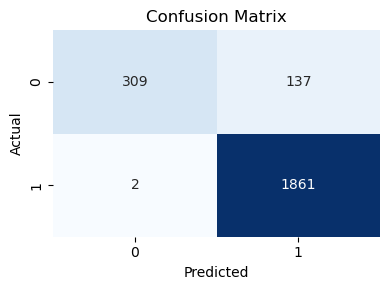


Class 0 — Precision: 0.9936, Recall: 0.6928, F1: 0.8164

Class 1 — Precision: 0.9314, Recall: 0.9989, F1: 0.9640





NameError: name 'y_proba' is not defined

In [24]:
# K-Nearest Neighbours

# 1) Prepare X/y
X = credit_data[numerical_columns + categorical_columns]
y = LabelEncoder().fit_transform(credit_data['Loan Status'])

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Preprocessing transformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_columns)
])

# 4) Build a pipeline with KNN
knn_pipe = Pipeline([
    ('preproc', preprocessor),
    ('knn', KNeighborsClassifier())
])

# 5) Hyperparameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance']
}

grid = GridSearchCV(
    knn_pipe,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# 6) Fit & select best
grid.fit(X_train, y_train)
print("Best KNN params:", grid.best_params_)

best_knn = grid.best_estimator_

# 7) Predict & evaluate
y_pred = best_knn.predict(X_test)
evaluate_model(y_test, y_pred)
print("\n\n")

# optional, roc_auc tells us how clearly the two are separated 
from sklearn.metrics import roc_auc_score
print("ROC AUC (probabilities):", roc_auc_score(y_test, y_proba))

# optional, instead of flagging them as risky at default 0.5, flag them at 0.7 
# this reduces false positives (which idt is our case)
risky_flags = (y_proba > 0.7).astype(int)
evaluate_model(y_test, risky_flags)


In [ ]:
# K-Nearest Neighbours + SMOTE

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV

# build an imbalanced‐learn pipeline
imb_pipe = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'knn__n_neighbors': [5, 11, 17],
    'knn__weights':      ['uniform','distance'],
    'knn__p':            [1,2]       # try Manhattan vs Euclidean
}

grid = GridSearchCV(
    imb_pipe,
    param_grid,
    cv=5,
    scoring='recall',        # by default this is recall of the POS label=1
    n_jobs=-1, 
    verbose=1
)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)
evaluate_model(y_test, y_pred)


In [ ]:

# KNN + Tuning

# We tune on 
# optimisation for recall for class 0
# PCA for dimensionality reduction
# SMOTE + remove any borderline noise that will confuse the model
# GridSearchCV


# 1) scorer that optimizes recall on the charged-off class (label=0)
recall_0 = make_scorer(recall_score, pos_label=0)

# 2) build pipeline: scale & encode → PCA → SMOTETomek → KNN
knn_pipe = ImbPipeline([
    ('preproc', preprocessor),
    ('pca', PCA(n_components=10)),                   # reduce to 10 dims
    ('resample', SMOTETomek(sampling_strategy=0.5,   # 50/50 in train folds
                             random_state=42)),
    ('knn', KNeighborsClassifier())
])

# 3) hyperparameter grid for KNN
param_grid = {
    'knn__n_neighbors': [5, 11, 17],
    'knn__weights':      ['uniform', 'distance'],
    'knn__p':            [1, 2]
}

# 4) grid search optimizing class‑0 recall
grid = GridSearchCV(
    knn_pipe,
    param_grid=param_grid,
    cv=5,
    scoring=recall_0,
    n_jobs=-1,
    verbose=1
)

# 5) fit & select best
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_knn = grid.best_estimator_

# 6) predict on the real-world (imbalanced) test set
y_pred = best_knn.predict(X_test)

# 7) evaluate with your helper
evaluate_model(y_test, y_pred)


Total predictions: 2309
Predicted to Default (label=1): 1998
Predicted NOT to Default (label=0): 311

Breakdown of 'Predicted to Default':
 prob_range
0–20%         0
20–40%        0
40–60%       57
60–80%       92
80–100%    1849
Name: count, dtype: int64

Breakdown of 'Predicted NOT to Default':
 prob_range
0–20%       97
20–40%     155
40–60%      59
60–80%       0
80–100%      0
Name: count, dtype: int64

Total from both pie charts: 2309


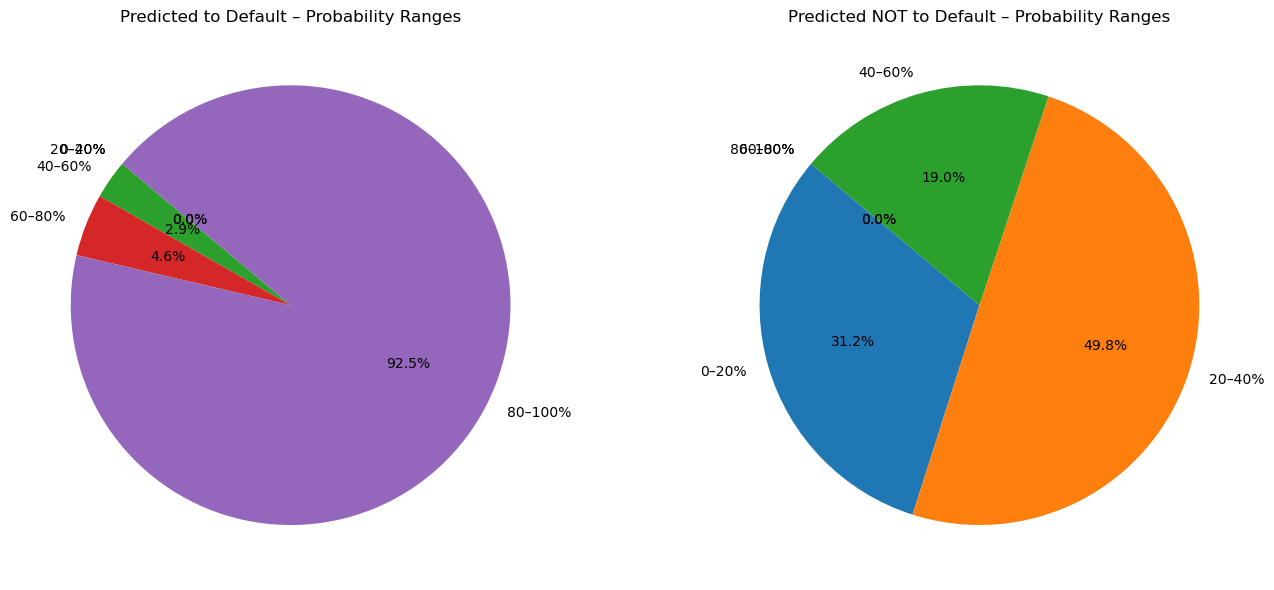

In [ ]:
# Confidence level 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get probabilities and predictions
y_proba = best_knn.predict_proba(X_test)[:, 1]
y_pred = best_knn.predict(X_test)

# Combine into a DataFrame
df = pd.DataFrame({
    'predicted_label': y_pred,
    'prob_default': y_proba
})

# Define probability bins
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0–20%', '20–40%', '40–60%', '60–80%', '80–100%']

# Fix: Include lowest and make right edge inclusive
df['prob_range'] = pd.cut(
    df['prob_default'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

# Count bin distribution for each predicted label
default_counts = df[df['predicted_label'] == 1]['prob_range'].value_counts().sort_index()
no_default_counts = df[df['predicted_label'] == 0]['prob_range'].value_counts().sort_index()

# ==== Sanity checks ====
print("Total predictions:", len(df))
print("Predicted to Default (label=1):", len(df[df['predicted_label'] == 1]))
print("Predicted NOT to Default (label=0):", len(df[df['predicted_label'] == 0]))
print("\nBreakdown of 'Predicted to Default':\n", default_counts)
print("\nBreakdown of 'Predicted NOT to Default':\n", no_default_counts)
print("\nTotal from both pie charts:", default_counts.sum() + no_default_counts.sum())

# Plot pie chart: Predicted Default
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Predicted to Default – Probability Ranges')

# Plot pie chart: Predicted No Default
plt.subplot(1, 2, 2)
plt.pie(no_default_counts, labels=no_default_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Predicted NOT to Default – Probability Ranges')

plt.tight_layout()
plt.show()
